In [1]:
# Import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df[df.duplicated(keep = False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [8]:
df.drop_duplicates(keep = 'first', inplace = True)

In [9]:
df.reset_index(drop = True)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [10]:
# Boxplot for all independent variables

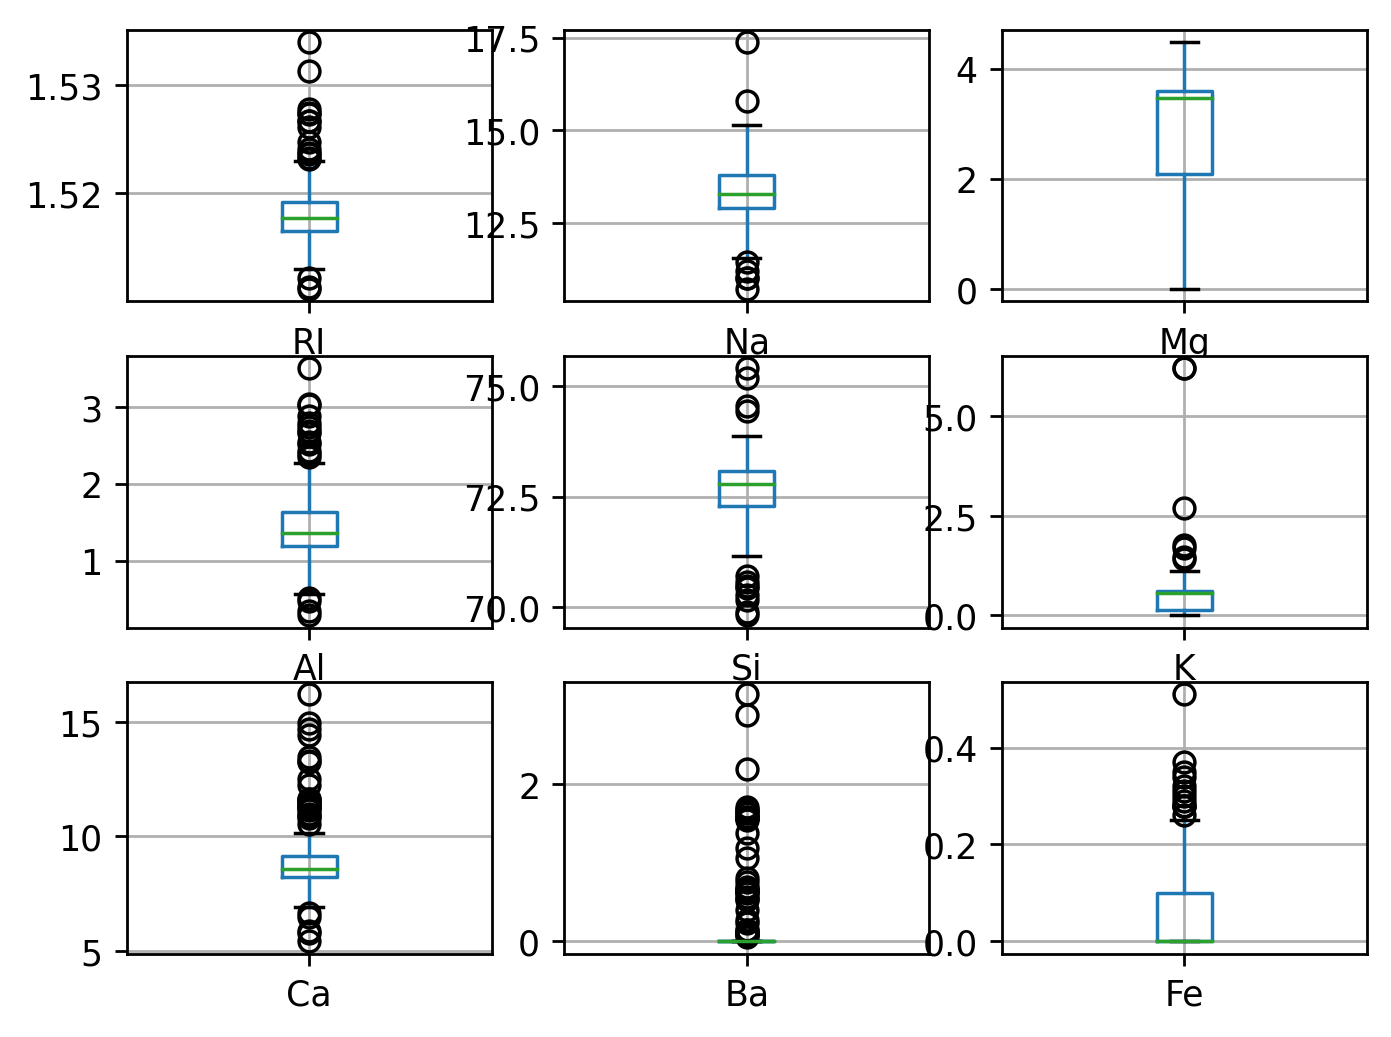

In [13]:
n = 1
for i in df.loc[:,"RI":"Fe"]:
    plt.subplot(3,3,n)
    df[[i]].boxplot()
    plt.tight_layout
    n = n + 1

In [14]:
# Histogram for all independent variable

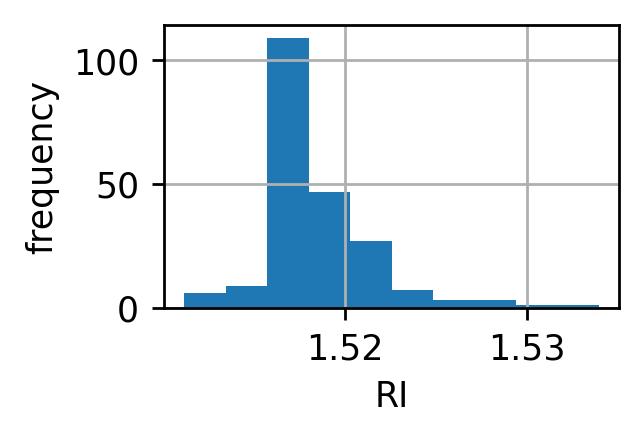

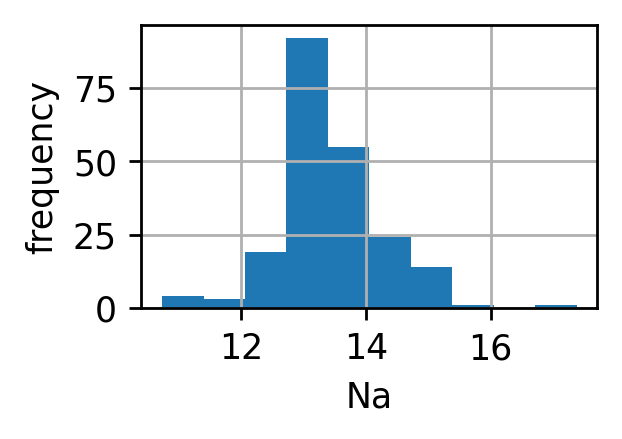

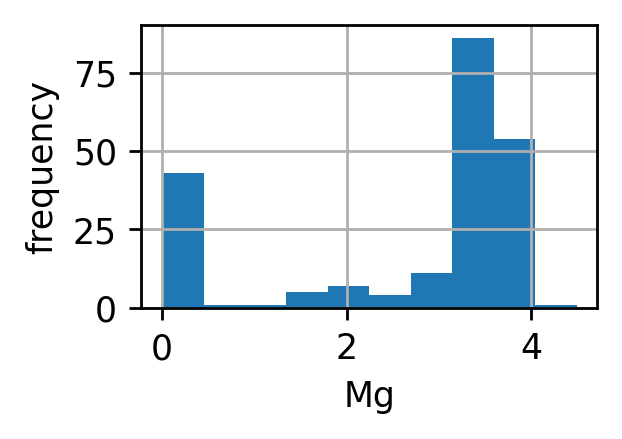

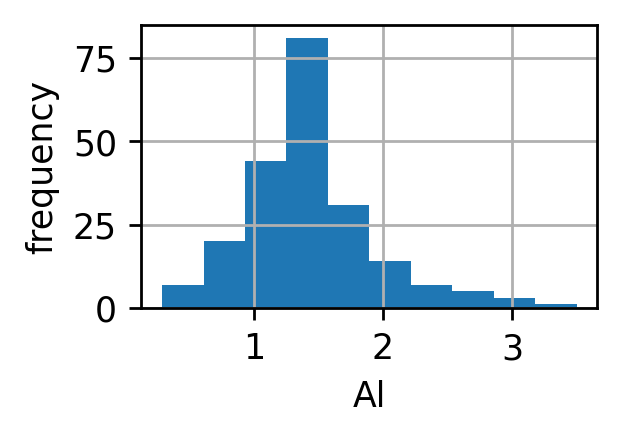

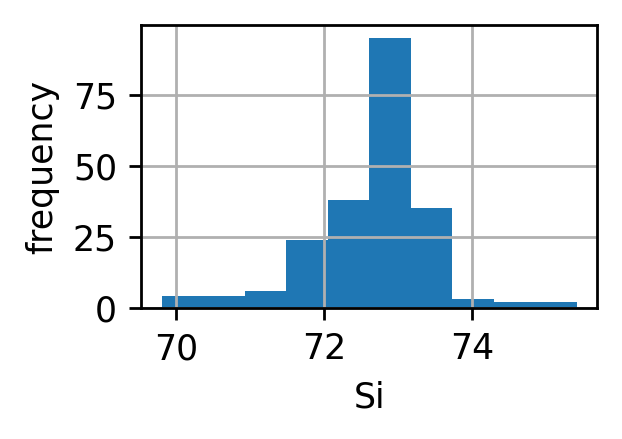

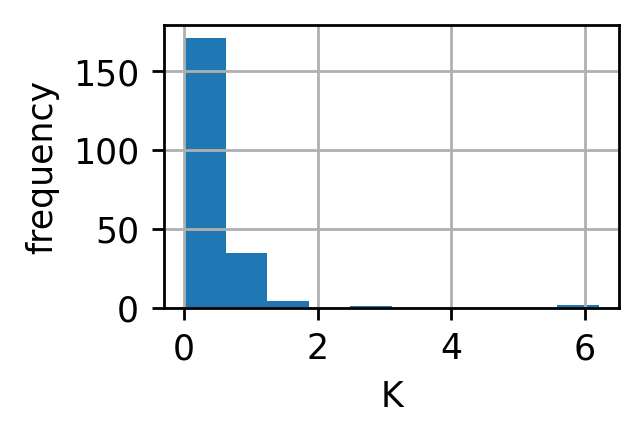

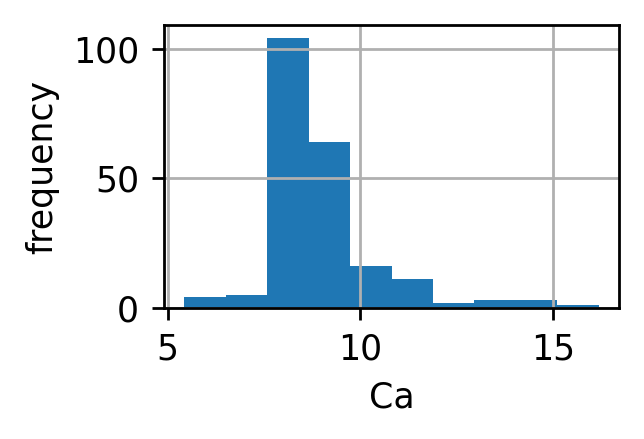

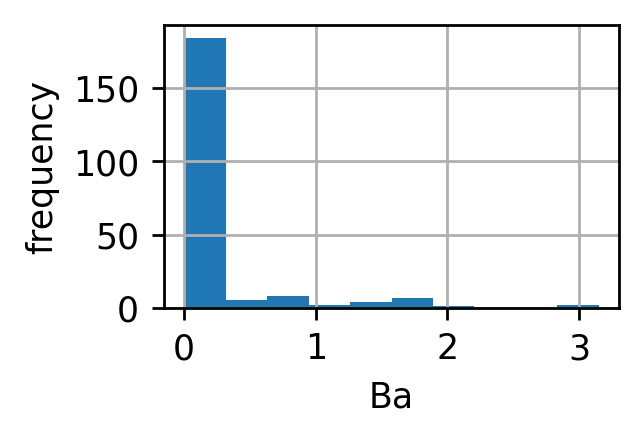

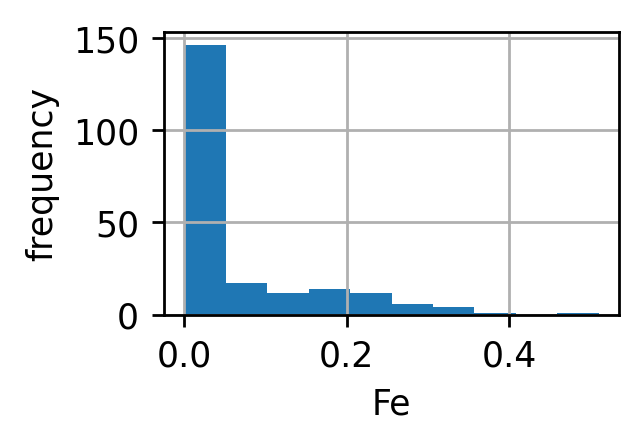

In [15]:
n = 1
for i in df.loc[:,"RI":"Fe"]:
    plt.figure(figsize = (8,5))
    plt.subplot(3,3,n)
    df[i].hist()
    plt.xlabel(i)
    plt.ylabel('frequency')
    plt.tight_layout
    n = n + 1

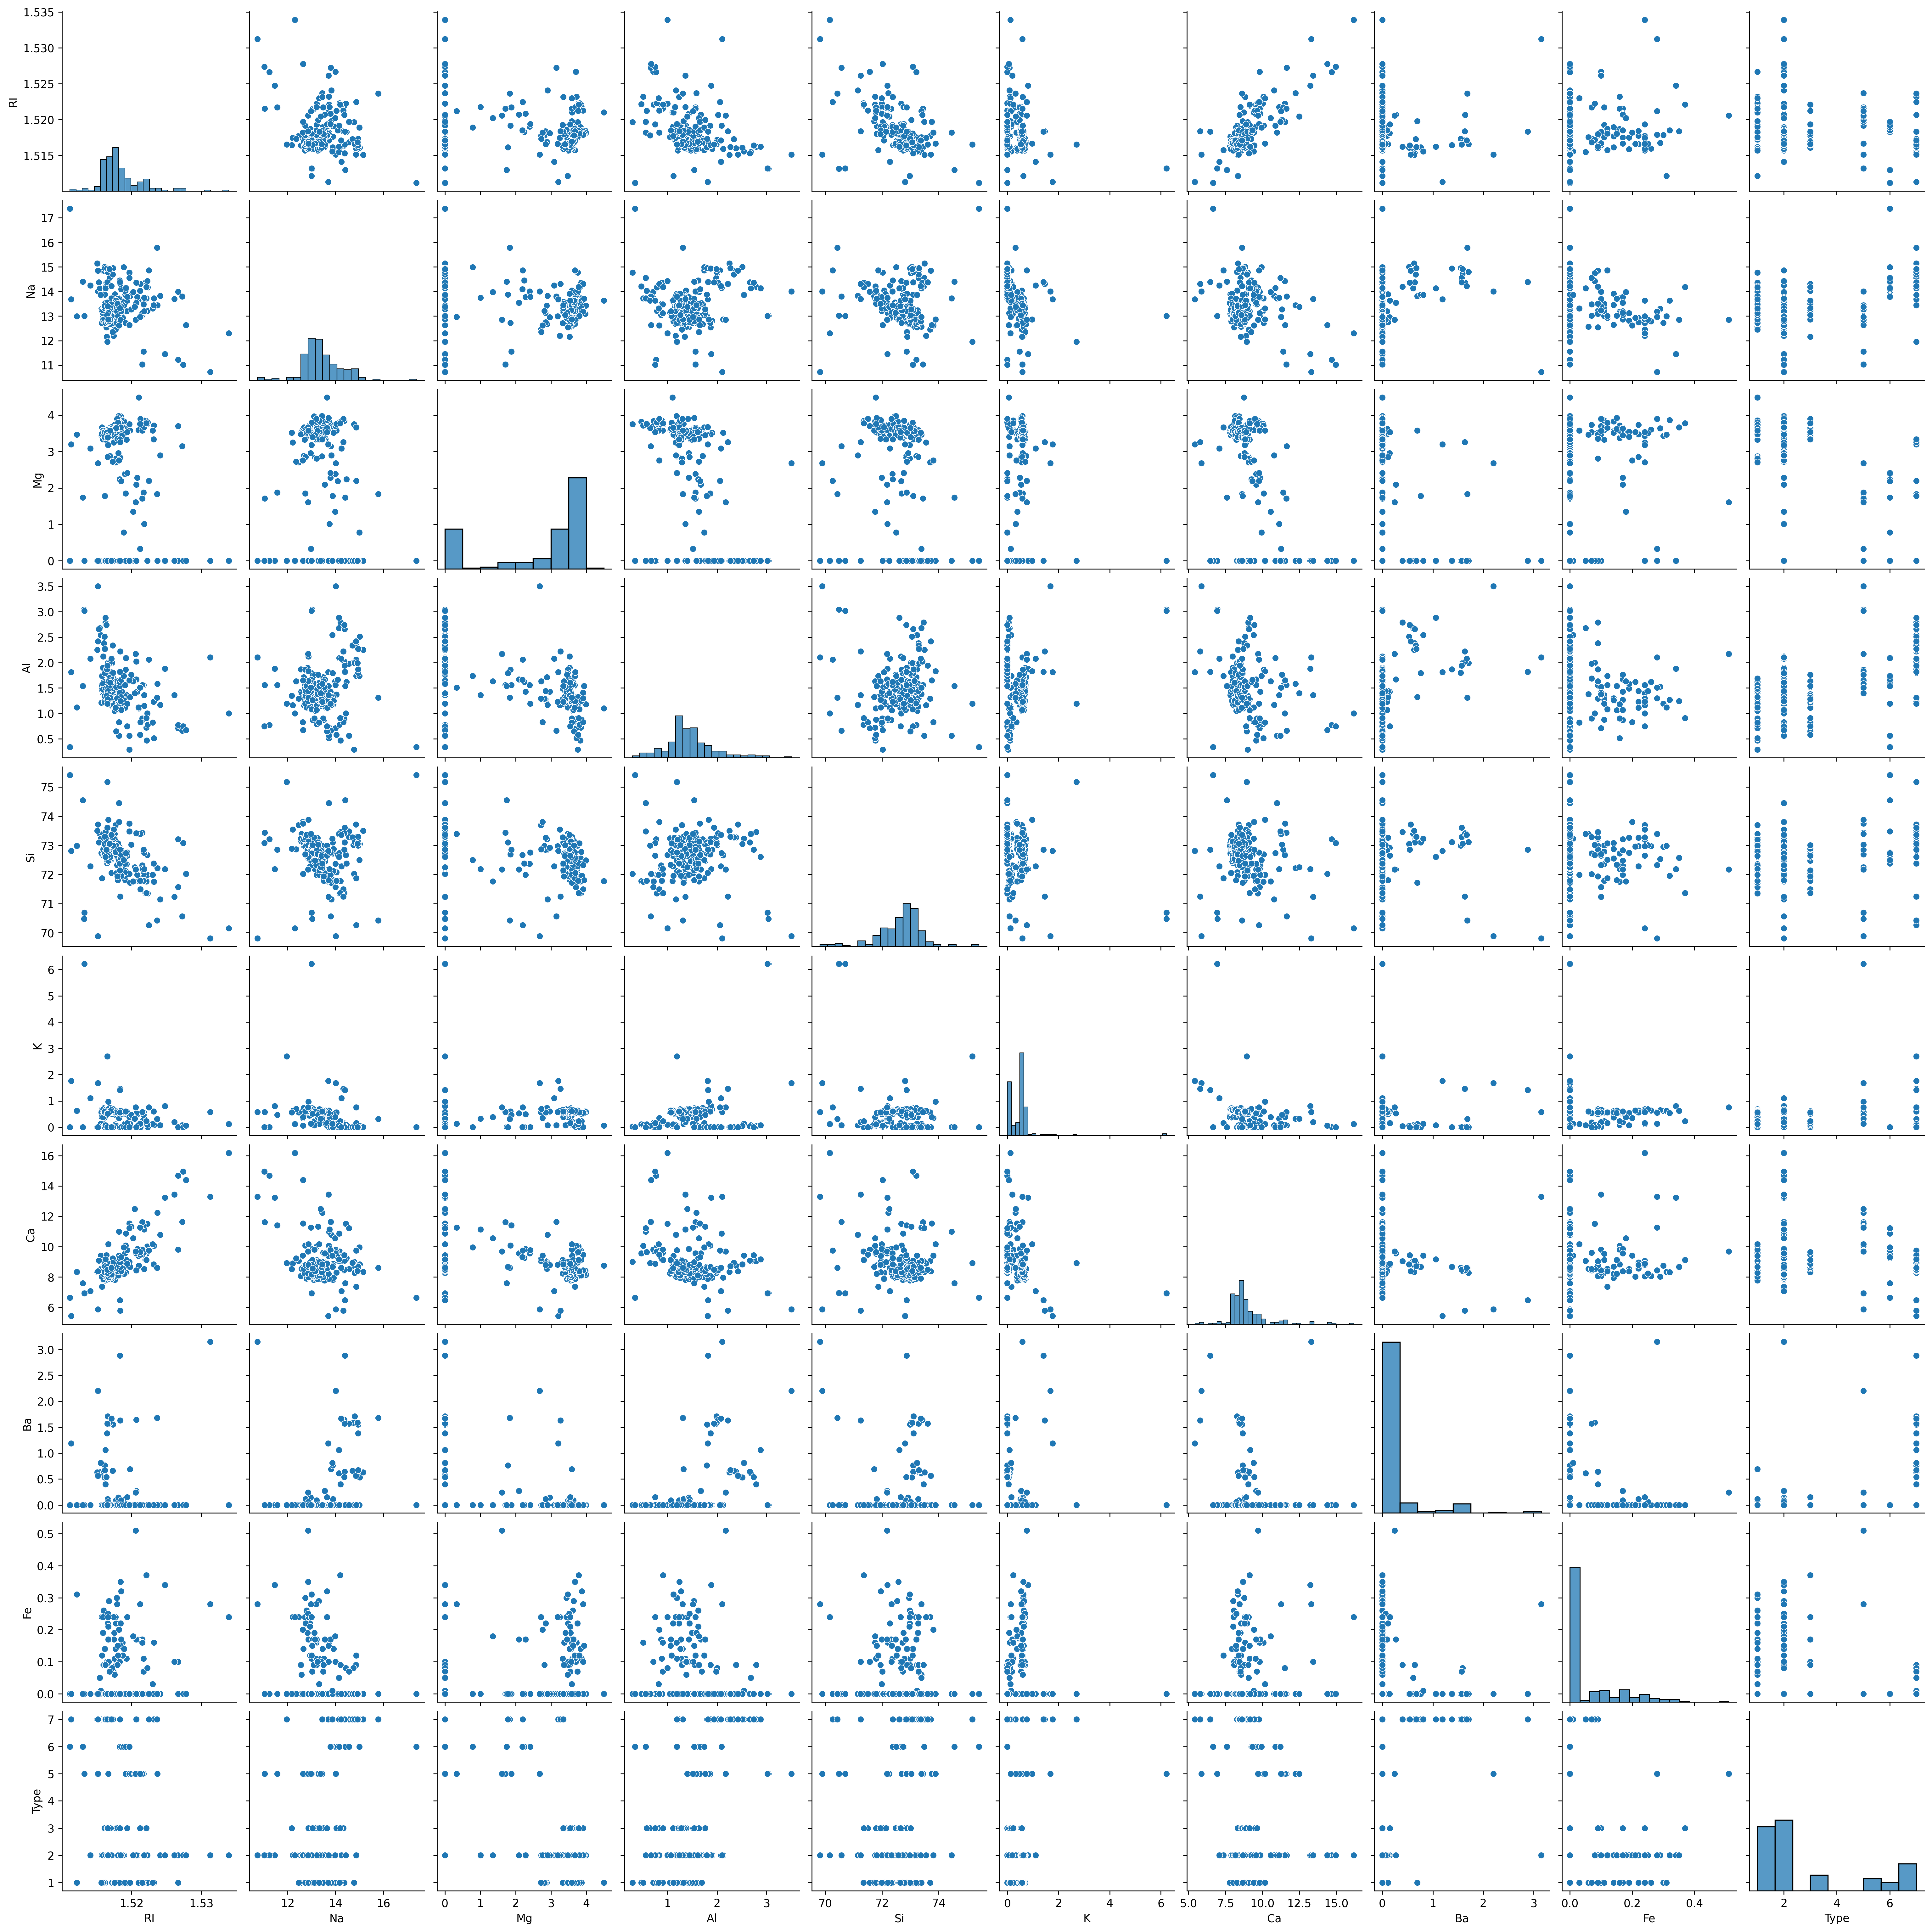

In [16]:
sns.pairplot(df)

In [17]:
# Splitting data into independent and dependent variable

In [18]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [19]:
# Correlation between independent features

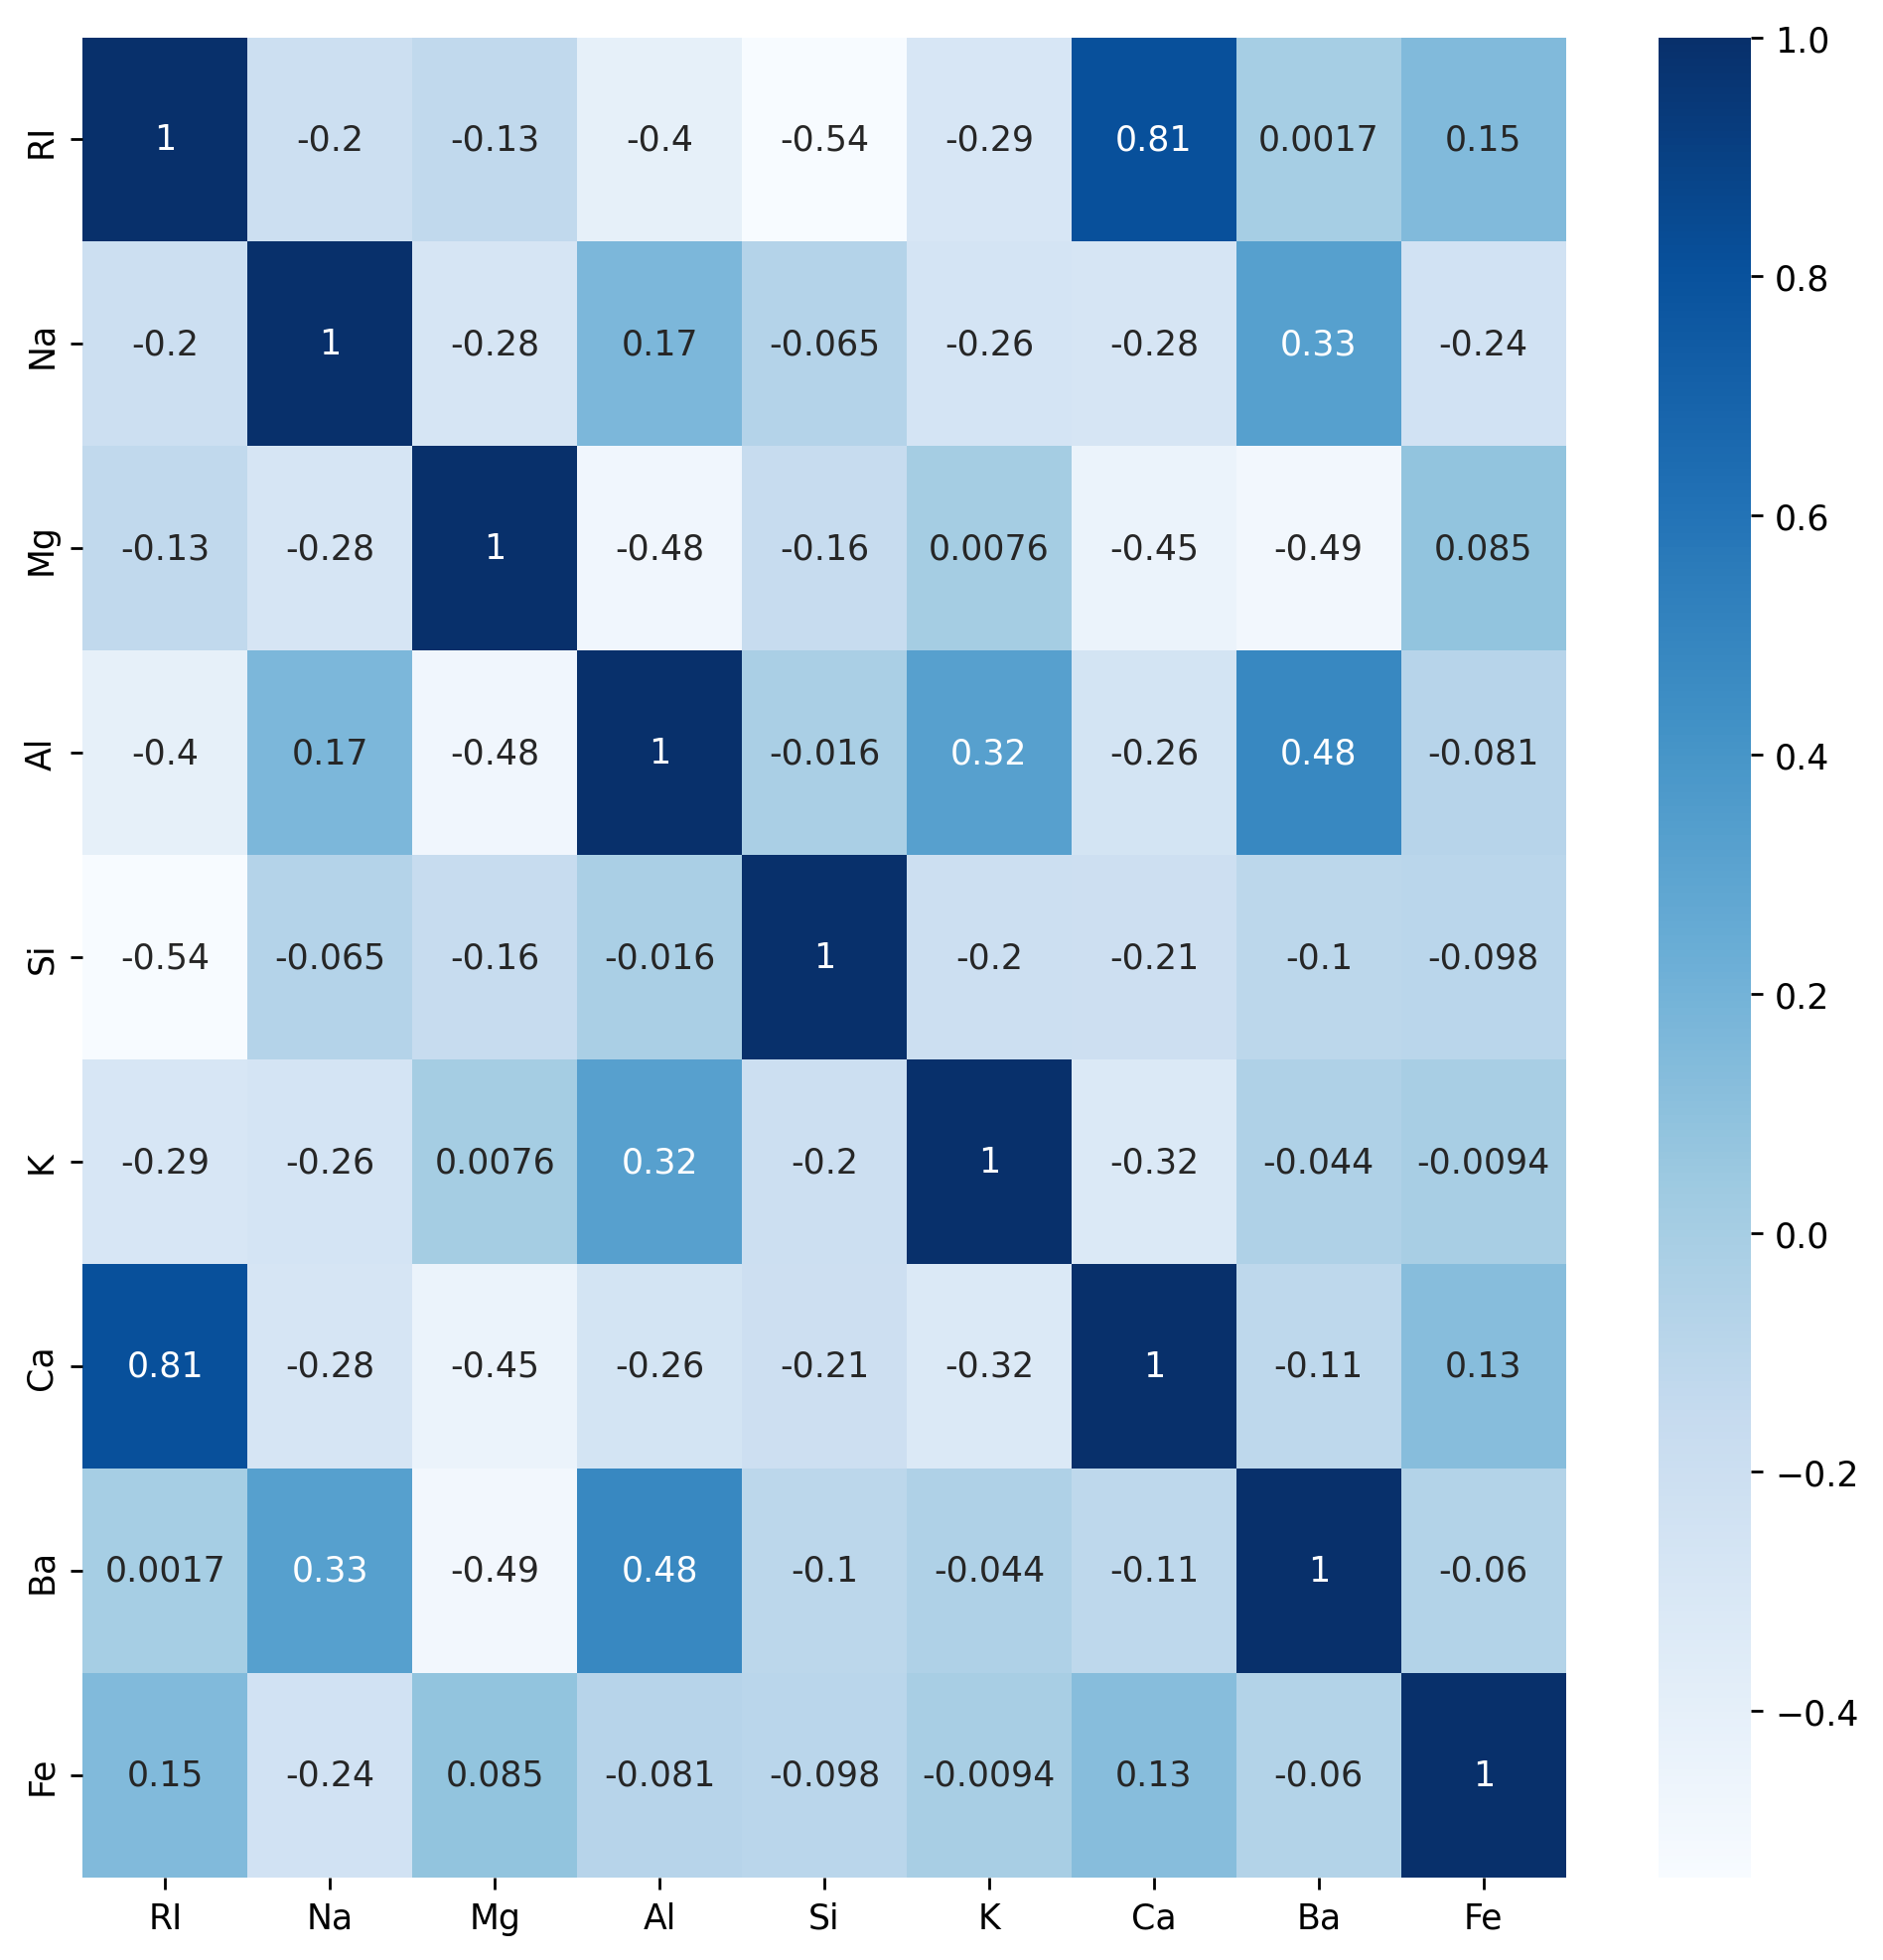

In [21]:
plt.figure(figsize = (8,8))
sns.heatmap(x.corr(), annot = True, cmap = 'Blues')
plt.tight_layout()

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [23]:
df_std = sc.fit_transform(x)
df_std

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [24]:
# Model Building

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [27]:
# Checking accuracy of model with k = 5

In [28]:
model = KNeighborsClassifier()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
    
print("Train Accuracy:", model.score(xtrain,ytrain))
print("Test Accuracy:", model.score(xtest,ytest))
print(classification_report(ytest,ypred))

Train Accuracy: 0.7294117647058823
Test Accuracy: 0.6976744186046512
              precision    recall  f1-score   support

           1       0.70      0.89      0.78        18
           2       0.90      0.69      0.78        13
           3       0.00      0.00      0.00         6
           5       0.33      1.00      0.50         1
           6       1.00      0.50      0.67         2
           7       0.75      1.00      0.86         3

    accuracy                           0.70        43
   macro avg       0.61      0.68      0.60        43
weighted avg       0.67      0.70      0.67        43



- Training accuracy is high as compaired to testing accuracy.

In [29]:
# Checking diffenent k values to get optimum k value.

In [30]:
trainac = []
testac = []

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    
    trainac.append(knn.score(xtrain, ytrain))
    testac.append(knn.score(xtest, ytest))

In [31]:
Accuracy = pd.DataFrame()
Accuracy['Training'] = trainac
Accuracy['Testing'] = testac
Accuracy

,Training,Testing
0,1.000000,0.720930
1,0.835294,0.674419
2,0.823529,0.651163
3,0.770588,0.674419
4,0.729412,0.697674
5,0.729412,0.720930
6,0.729412,0.651163
7,0.688235,0.651163
8,0.664706,0.651163
9,0.647059,0.627907


In [32]:
# Plotting accuracy scores to check optimum k value

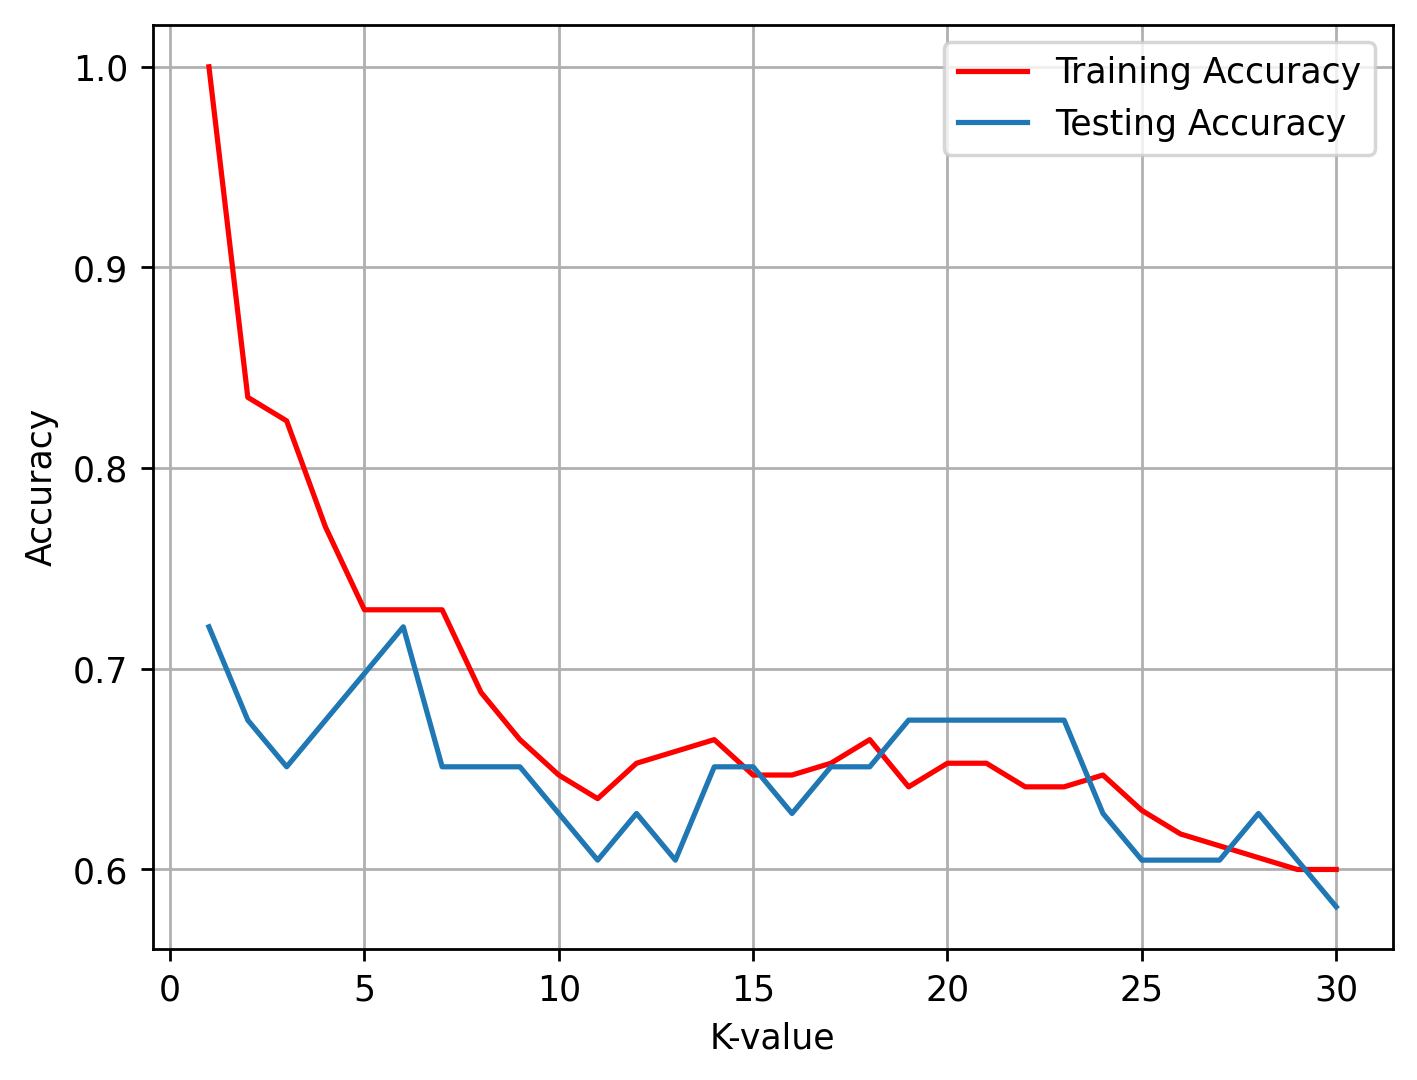

In [33]:
plt.plot(range(1,31), trainac, color = 'r', label = 'Training Accuracy')
plt.plot(range(1,31), testac, label = 'Testing Accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

- At k = 6 we get good accuracy scores.

In [34]:
# Building model using k = 6

In [35]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

print('Train Accuracy:', knn.score(xtrain, ytrain))
print('Test Accuracy:', knn.score(xtest, ytest))
print(classification_report(ytest, ypred))

Train Accuracy: 0.7294117647058823
Test Accuracy: 0.7209302325581395
              precision    recall  f1-score   support

           1       0.68      0.94      0.79        18
           2       1.00      0.62      0.76        13
           3       0.50      0.17      0.25         6
           5       0.33      1.00      0.50         1
           6       1.00      0.50      0.67         2
           7       0.75      1.00      0.86         3

    accuracy                           0.72        43
   macro avg       0.71      0.70      0.64        43
weighted avg       0.76      0.72      0.70        43



- Model accuracy = 72%

In [36]:
df = pd.DataFrame()
df['Actual'] = ytest
df['Predicted'] = ypred
df

,Actual,Predicted
109,2,5
192,7,7
107,2,2
108,2,5
52,1,1
33,1,1
60,1,3
153,3,1
4,1,1
31,1,1


In [37]:
# Accurate prediction

In [38]:
df[df['Actual'] == df['Predicted']]

,Actual,Predicted
192,7,7
107,2,2
52,1,1
33,1,1
4,1,1
31,1,1
119,2,2
40,1,1
70,2,2
113,2,2


In [39]:
# False prediction

In [40]:
df[df['Actual'] != df['Predicted']]

,Actual,Predicted
109,2,5
108,2,5
60,1,3
153,3,1
94,2,1
162,3,1
95,2,1
98,2,1
159,3,1
181,6,7
